#**Machine Learning Tutorial - Classification Model**
A classification model is an ML model that predicts a object's "class" based on data features. In this example, our classification is binary 1 means Diabetes, 0 means no Diabetes. The objective of this file is to collect our data, clean it, train our model, and then analyze the results.

This first cell is all of our imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Data Download
This cell is where we download our data and load it into a pandas dataframe. A lot of machine learning is optimized by using numpy and pandas to do a lot of the math much faster than we could do manually. We then preview our data with the DataFrame.head() command, which shows us the first 5 rows in our dataframe.

In [ ]:
#Read the url from the Synthetic Patients Github
url = "https://raw.githubusercontent.com/keenebrogan/Synthetic-Patients/main/data/classification_diabetes.csv"
#Init the data frame, where we will store all of our data
df = pd.read_csv(url)
#Store the values as a separate file
print(f"Data shape: {df.shape}")
#Preview our data
df.head() # alternative is df.tail() to show the end or df.head(10) for a specific amount of rows

Data shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Cleaning
Data cleaning is a process whereby we alter our data to make it ready for any sort of analysis or training. This means removing invalid values, making additional calculations, or adding new data. In the step below we're just checking to make sure there aren't any null values or duplicates.

In [ ]:
# Data cleaning
print("\nDATA CLEANING")
# --- Check for missing values
missing_values = df.isnull().sum()
print("Missing Values : ")
print(missing_values)
# --- Handle missing values
mean_fill = df.fillna(df.mean())
df.fillna(mean_fill, inplace=True)
# --- Check for duplicate values
duplicate_values = df.duplicated().sum()
print("Duplicate Values : ")
print(duplicate_values)
# --- Drop duplicate values
df.drop_duplicates(inplace=True)


DATA CLEANING
Missing Values : 
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Duplicate Values : 
0


# Data Analysis
Here we get an idea of what the distribution of our dataset looks like. Percentiles, means, stds, and so on are given below.

In [ ]:
# DATA ANALYSIS
print("\nDATA ANALYSIS")
# --- Summary Statistics
summary_stats = df.describe()
print("Summary Statistics : ")
print(summary_stats)
# --- Class Distribution
class_distribution = df["Outcome"].value_counts()
print("Class Distribution : ")
print(class_distribution)



DATA ANALYSIS
Summary Statistics : 
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951 

# Model Training
Firstly, the code segment separates the features (X) and the target variable (y) from the dataset df, discarding the "Outcome" column for X and using it for y. It then splits the data into training and testing sets, reserving 20% of the data for testing. The features are standardized using the StandardScaler from scikit-learn to have a mean of 0 and a variance of 1, which is a common preprocessing step to ensure that all features contribute equally to the distance metric used in SVM. An SVM model is then initialized and fitted to the training data. Following this, the model is used to make predictions (y_pred) on the unseen testing data (X_test). Lastly, the model's performance is evaluated using accuracy as the metric, which is computed as the ratio of correctly predicted instances to the total number of instances in the testing set. This accuracy score is then printed to the console.

**Why do we split training and testing data?**
* The main objective is to evaluate the model's performance on unseen data, which is a good indicator of how the model will perform in real-world scenarios.
* It provides a check against overfitting, where a model might perform exceedingly well on the training data but poorly on any new data.

In [ ]:
# Support Vector Machine Modelling
print("\nMODELLING")
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
# --- Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
# --- Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# --- init and train SVM model
model = svm.SVC(kernel="linear")
model.fit(X_train, y_train)
# --- Predict on test data
y_pred = model.predict(X_test)
# --- Evaluate model performance
accuracy = model.score(X_test, y_test)
print("Model Accuracy : ")
print(accuracy)


MODELLING
Model Accuracy : 
0.7597402597402597


These values—precision, recall, f1-score, and support—are commonly used metrics to evaluate the performance of a classification model. Here's a breakdown of what each of these metrics represents:

1. Precision:
Precision is the ratio of correctly predicted positive observations to the total predicted positives. It's a measure of the accuracy of the positive predictions made by the model.

2. Recall (Sensitivity):
Recall is the ratio of correctly predicted positive observations to all the observations in actual class. It measures the ability of the model to find all the positive cases.

3. F1-Score:
The F1-score is the harmonic mean of precision and recall, with a higher score signifying a better model. It is particularly useful when you have an uneven class distribution or when false positives and false negatives carry different costs.

4. Support:
Support is the number of actual occurrences of the class in the specified dataset. It's important as it can highlight imbalanced classes which might be affecting the performance of the classifier.

In [ ]:
# --- Classification Report and Confusion Matrix
print("Classification Report : ")
print(classification_report(y_test, y_pred))

Classification Report : 
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



A Confusion Matrix is a table used to evaluate the performance of a classification model by displaying the true and false predictions made by the model in a tabular form. It provides insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

**Components of a Confusion Matrix:**

* True Positive (TP): The cases in which the model predicted the positive class correctly.
* True Negative (TN): The cases in which the model predicted the negative class correctly.
* False Positive (FP): The cases in which the model predicted the positive class incorrectly (i.e., it was actually negative).
* False Negative (FN): The cases in which the model predicted the negative class incorrectly (i.e., it was actually positive).

**Layout of Confusion Matrix:**

The rows of the matrix represent the actual classes, while the columns represent the predicted classes.
The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier.

Confusion Matrix : 


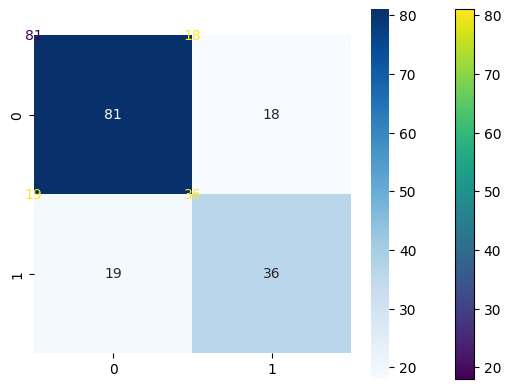

Displayed


In [ ]:
print("Confusion Matrix : ")
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
sns.heatmap(cm.confusion_matrix, annot=True, cmap="Blues")
plt.show()
print("Displayed")

# How does understanding classification let us understand the process of generating synthetic patients?

Understanding classification provides a foundation for comprehending the generation of synthetic patients, particularly in the realm of healthcare analytics and modeling. Here’s how the two are interlinked:

1. Data Representation and Feature Engineering:
Classification requires a clear understanding of the features that are indicative of certain outcomes or labels. Similarly, when generating synthetic patients, understanding the relevant features and their distributions is crucial for creating realistic data.
2. Model Training:
In classification, models are trained to predict outcomes based on input features. Similarly, models can be trained to generate synthetic data based on real data distributions. For instance, Generative Adversarial Networks (GANs) or Variational Autoencoders (VAEs) can be trained to generate synthetic patient data that is statistically similar to real data.
3. Evaluation Metrics:
Just as classification models are evaluated using metrics like precision, recall, and F1-score, models generating synthetic patients need to be evaluated to ensure that the synthetic data maintains the statistical properties of the real data while ensuring privacy.
4. Imbalanced Data Handling
Classification models often encounter challenges with imbalanced data which is also a common issue in healthcare data. Synthetic data generation can help in addressing class imbalances by generating more samples of the under-represented class, improving model training, and evaluation.

# Next Steps
Feel free to make a copy of this notebook and play around with the data file that you use for classification. Here are the 2 datasets we used last year. See if you can modify the code to accurately train a machine learning model for one of them

In [ ]:
url_pima = "https://raw.githubusercontent.com/keenebrogan/smote/main/diabetes.csv"
url_brfss = "https://raw.githubusercontent.com/keenebrogan/smote/main/diabetes_binary_health_indicators_BRFSS2015.csv"
df_pima = pd.read_csv(url_pima)
df_brfss = pd.read_csv(url_brfss)

In [ ]:
# Your code here -- try following the steps outlined above